# Алгоритм серых волков



## Введение

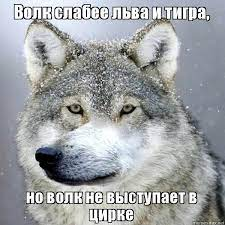

Алгоритм серых волков — метаэвристический стохастический алгоритм роевого интеллекта, разработанный в 2014 году, идея которого построена на основе модели охоты стаи серых волков. Выделяются четыре типа волков: альфа, бета, дельта и омега. Альфа имеет наибольший «вес» в принятии решений и управлении стаей. Далее идут бета и затем дельта, которые подчиняются альфе и имеют власть над остальными волками. Волк омега всегда подчиняется остальным доминирующим волкам.

Реальная охота стаи волков выглядит схожим образом:
[Wolves hunting | BBC | YouTube](https://youtu.be/VlZ5ddpqFbs)

В математической модели иерархии волков Альфа-α-волк считается доминирующим волком в стае, и его приказы должны выполняться членами стаи. Бета-β-подчиненные волки, которые помогают альфе в принятии решений и считаются лучшим кандидатом на роль альфы. Волки дельты δ должны подчиняться альфе и бета, но они доминируют над омегой. Волки Омега ω считаются козлами отпущения в стае, являются наименее важными особями в стае, и им разрешается есть только в конце. Альфа считается наиболее благоприятным решением.

Второе и третье лучшее решение, соответственно бета и дельта. Остальные решения считаются омегами. Полагается, что к самым приспособленным волкам (альфа, бета и дельта), то есть находящимся ближе всего к добыче, будут приближаться остальные волки. После каждого приближения определяется кто на данном этапе альфа, бета и дельта, а затем волки опять перестраиваются. Перестроение происходит до тех пор, пока волки не собираются в стаю, что будет являться оптимальным направлением для атаки с минимальным расстоянием.

В ходе алгоритма выполняются 3 основных этапа, в которых волки ищут добычу, окружают и атакуют ее. В процессе поиска обнаруживаются альфа, бета и дельта — волки, которые находятся ближе всего к добыче. Остальные, подчиняясь доминирующим, могут начать окружать добычу или продолжить произвольное перемещение в поисках лучшего варианта.

## Описание алгоритма
Иерархия в стае представлена схематично рисунком 1.  Распределение ролей между членами стаи, доминирующую роль играет alpha.

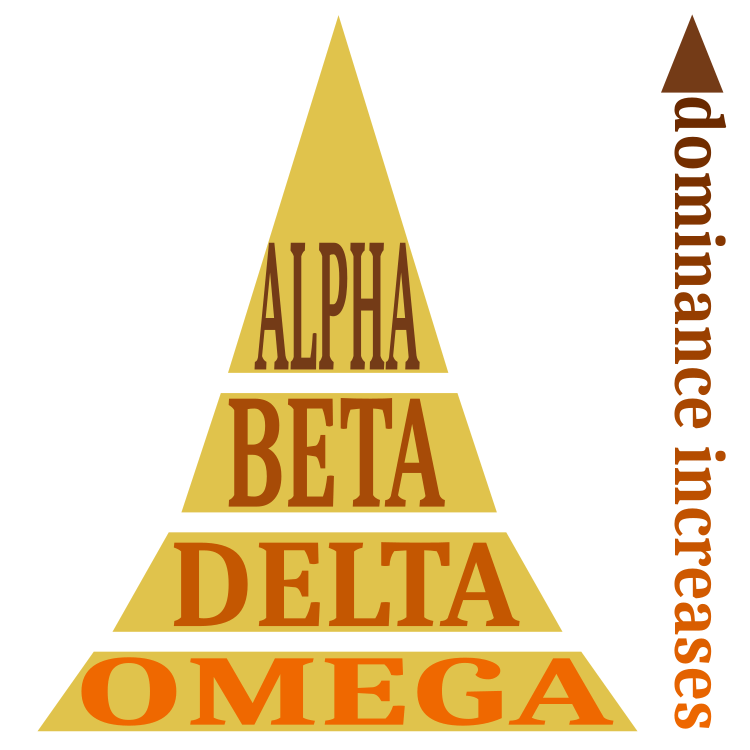

Рисунок 1. Социальная иерархия в стае волков.

### Математическая модель и алгоритм
Социальная иерархия:
*   Лучшее решение в виде альфа-волка (α).
*   Второе лучшее решение в роли бета-волка (β).
*   Третье лучшее решение в качестве дельта-волка (δ).
*   Остальные возможные решения как волки Омега (ω).

Окружение добычи: когда уже есть лучшие решения альфа, бета и дельта, дальнейшие действия зависят от омега.

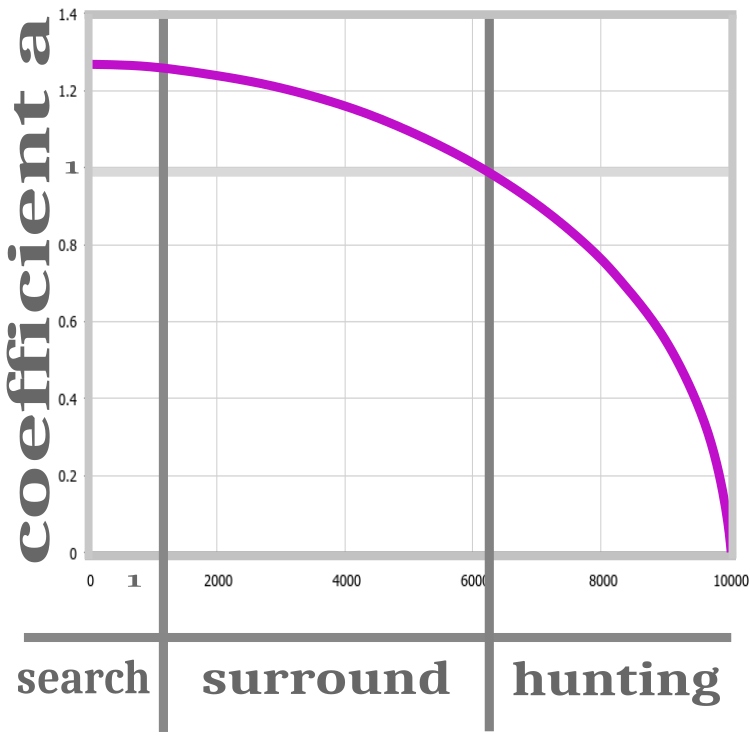

Рисунок 2. Стадии охоты: поиск, окружение, нападение.

Все итерации алгоритма представлены тремя этапами: поиск, окружение и охота. Для этого в каноническом варианте алгоритма присутствует расчетный коэффициент а, он введен для улучшения сходимости алгоритма, на каждой итерации уменьшаясь до нуля. Пока коэффициент превышает 1, идет инициализация волков. На этом этапе совершенно неизвестно положение добычи, поэтому волки должны быть распределены случайным образом.

После этапа "поиск" определяется значение фитнес функции и только после этого можно переходить к этапу "окружение". На этом этапе коэффициент а больше 1, это означает, что альфа бета и дельта отдаляются от своих предыдущих позиций, позволяя тем самым уточнить положение предполагаемой добычи. Когда коэффициент а становится равным 1, тогда начинается этап "нападение" и до окончания итераций коэффициент стремится к 0. Это приводит к приближению волков к добыче, предполагая, что лучшее её положение уже найдено. Хотя, если на этом этапе один из волков обнаружит более лучшее решение, то положение добычи будет обновлено и иерархия волков обновится, но коэффициент все равно будет продолжать стремится к 0. Процесс изменения а представлен нелинейной функцией, этапы схематично показаны на рисунке 2.

Поведение волков омеги неизменно на протяжении всех эпох и заключается в следовании к геометрическому центру между положением доминирующих в данный момент особей. На рисунке 3 омеги перемещаются в центр между альфой, беттой и дельтой, причем не точно в центр, а с некоторой долей вероятности отклоняясь от него в пределах радиуса. Радиусы определяет коэффициент а, который, как мы помним, изменяется, уменьшаясь заставляя уменьшаться пропорционально и радиусы.

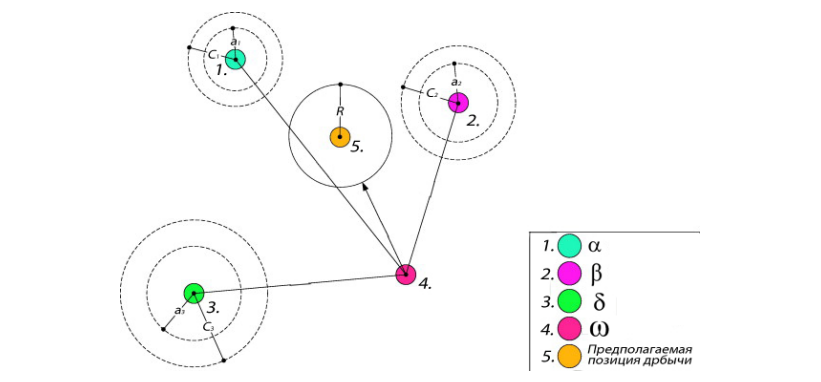

Рисунок 3. Схема движения омеги по отношению к альфа, бета и дельта.

Псевдокод алгоритма GWO заключается в следующем:
1.   Случайным образом инициализировать популяцию серых волков.
2.   Рассчитать преспособленность каждого члена популяции.
3.   Лидеры стаи:
      *   α = член с лучшим значением пригодности
      *   β = второй лучший участник (с точки зрения значения пригодности)
      *   δ = третий лучший участник (с точки зрения значения пригодности)
      
     Обновить положение всех омега-волков по формулам в зависимости от α, β, δ
4.   Рассчитать преспособленность каждого члена популяции.
5.   Если преспособленность меньше точности или достигнуто максимальное количество поколений, то прекратить выполнение алгоритма
6.   Повторить шаг 3.

Для обновления положения волков используется следущие правила:

Для каждого волка с ролью омега считаются свои вектора 𝑋⃗
вычисляются с учетом известных позиций волков 𝛼, 𝛽, 𝛿 по следующим
формулам

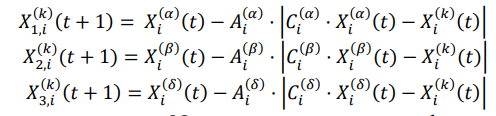

где i – номер компоненты N мерного пространства, k- номер волка с
ролью 𝜔.

Тогда итоговая позиция любого рассматриваемого волка
определяется как

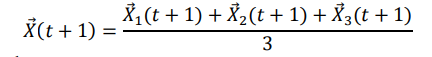

Коэффицтенты рассчитываются по следующим формулам: 

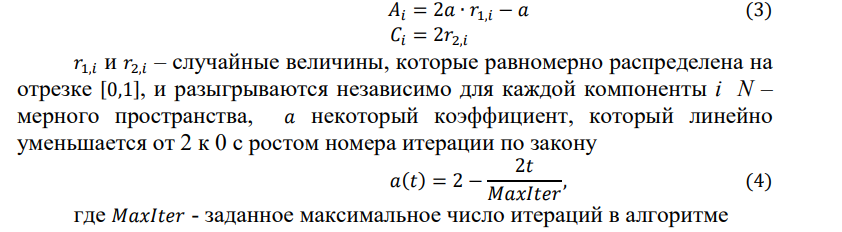

Следующие рисунки показывают зависимость поведения волков от коэффициента а:
 
 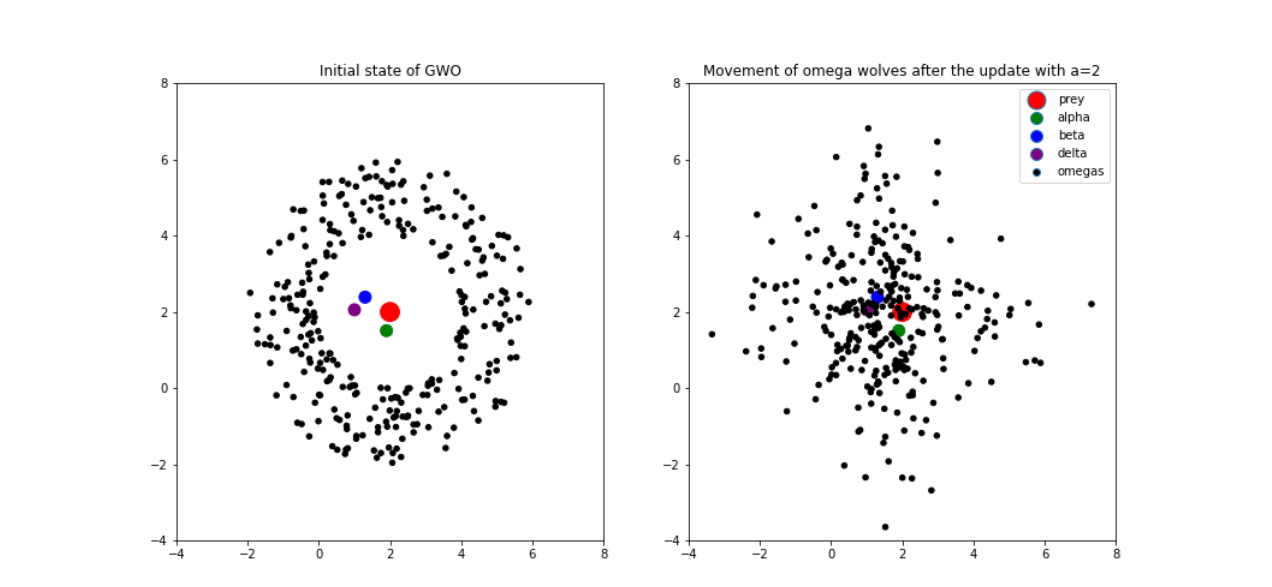

 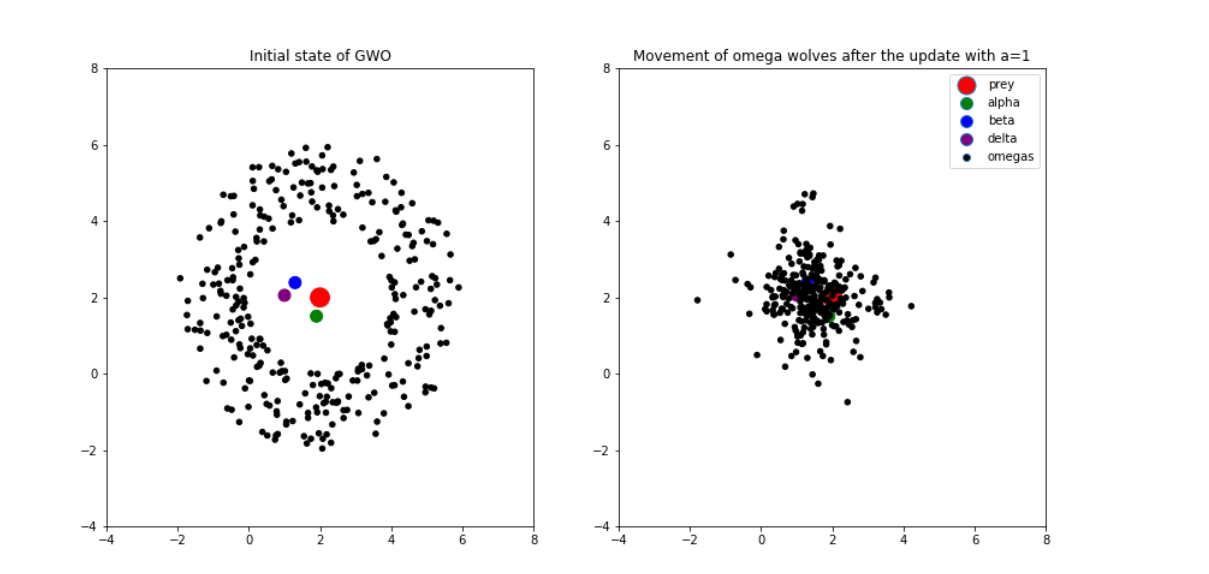

 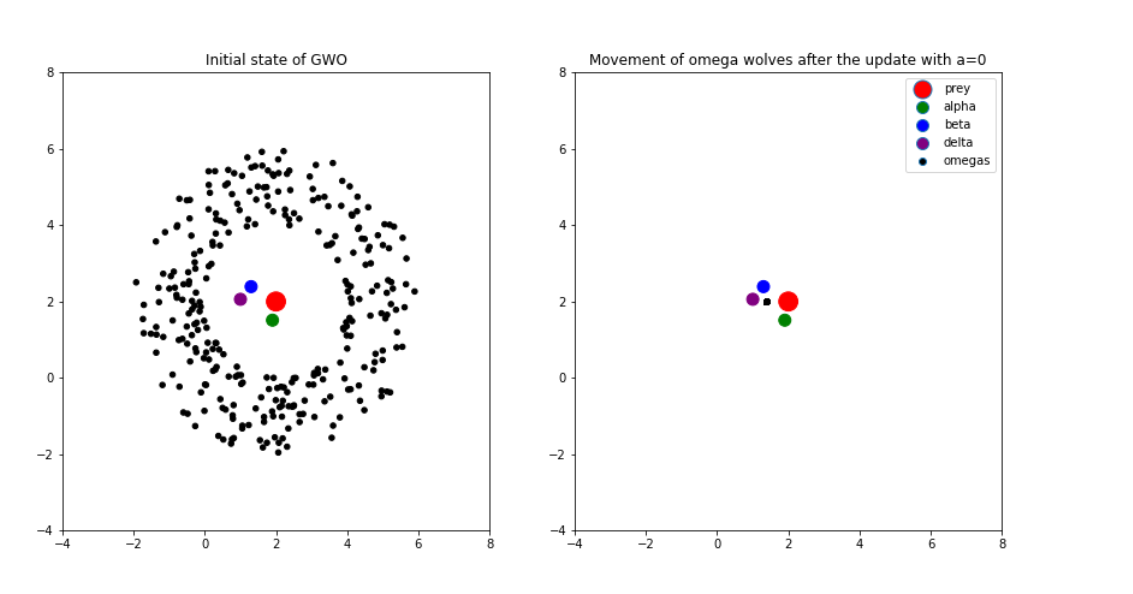

Анимация охоты волков в 2D пространстве в корелляции со значением коэффициента а:

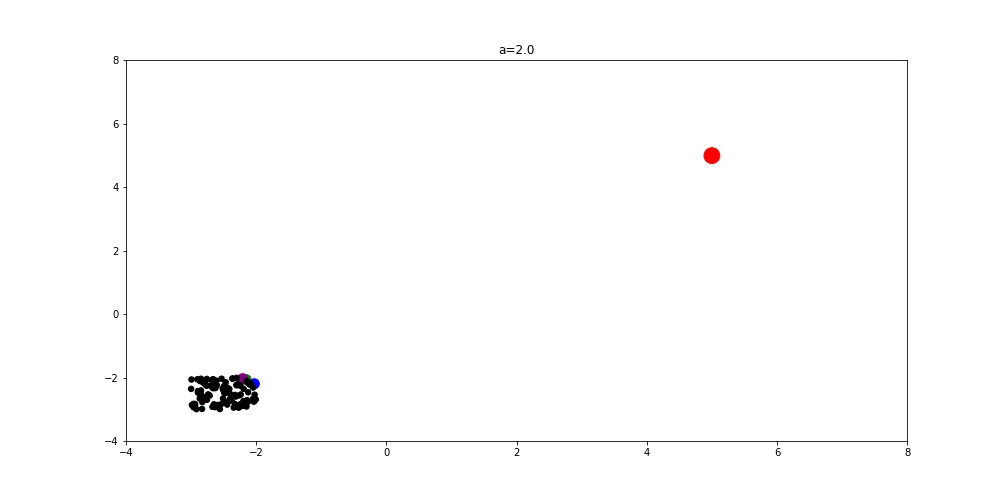

### Программная реализация алгоритма

Перейдём к рассмотрению кода алгоритма.

In [22]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import copy

In [23]:
# Фитнес функция 
# f(x1,x2)=(x1+2*-x2+3)^2 + (2*x1+x2-8)^2
def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  r = f1**2+f2**2
  return r

# def fitness_function(x1,x2):
#   f1=(x1*x1+x2-11)**2
#   f2=(x1+x2**2-7)**2
#   r = f1+f2
#   return r

In [24]:
def update_position(particle, alpha, betta, gamma, current_iteration, max_generations):
  # Инициализация массива скоростей
  dimensions = len(particle)
  new_position = np.array([0.0 for i in range(dimensions)])
  # Вычисляем коэффициент, который позволяет смоделировать то, что жертва (лучшая позиция) медленнее "убегает" от волков со временем
  iteration_koefficient = calculate_iteration_koefficient(current_iteration, max_generations)
  # Вычисляем новую скорость
  for i in range(dimensions):
    # Случайно генерируем веса r1, r2 по равномерному распределению
    r1 = random.uniform(0,1)
    r2 = random.uniform(0,1)
    # Рассчитываем коэффициент атаки (при значении коэфициента от -1 до 1 следующая позиция волка будет находиться
    # где-то между текущей позицией и потенциальным положением жертвы)
    A = 2.0*iteration_koefficient*r1 - iteration_koefficient
    # Рассчитываем коэффициент выслеживания (Данный параметр обеспечивает случайные веса для добычи, увеличивая (С> 1) или уменьшая (С
    # <1) влияние (запах) добычи при определении расстояния для перемещения. Это позволяет алгоритму серых волков демонстрировать более 
    # случайное поведение в процессе оптимизации, способствуя поиску и обходу локальных оптимумов.)
    C = 2.0*r2
    # Рассчитываем вектора к каждому лучшему волку
    alpha_shift = alpha[i] - A*(C*alpha[i] - particle[i])
    betta_shift = betta[i] - A*(C*betta[i] - particle[i])
    gamma_shift = gamma[i] - A*(C*gamma[i] - particle[i])
    # Рассчитываем положение жертвы (точку, куда переместится волк)
    new_position[i] = (alpha_shift + betta_shift + gamma_shift)/3
  return new_position

In [25]:
# Постепенно уменьшается с каждой итерацией (от 2 до 0)
def calculate_iteration_koefficient(current_iteration, max_generations):
  return 2-((2*current_iteration)/max_generations)

In [26]:
bestFitnessValues=[]
meanFitnessValues=[]

In [27]:
def pso(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Инициализация
  # Популяция
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Fitness
  fitness_values = [fitness_function(p[0],p[1]) for p in particles]
  # Vассив особи за одно поколение (чтобы потом выводить на график как менялось по поколениям)  
  particles_for_generation = []
  # Цикл по количеству поколений
  for t in range(generation):
    # Остановиться если значение фитнес функции достигло предопределенного критерия успеха
    if np.average(fitness_values) <= fitness_criterion:
      break
    else:
      # Находим альфу, бетту и гамму - трёх самых преспособленных волков
      best_wolves_indexes = np.argpartition(fitness_values, 3)[:3]
      alpha_index = best_wolves_indexes[0]
      betta_index = best_wolves_indexes[1]
      gamma_index = best_wolves_indexes[2]
      alpha = particles[alpha_index]
      betta = particles[betta_index]
      gamma = particles[gamma_index]
      # Цикл по особям в популяции
      for n in range(population):
        # Перемещаем всех волков кроме альфы, бетты и гаммы
        if n != alpha_index and n != betta_index and n != gamma_index:
          # Переместить особи в новую позицию
          particles[n] = update_position(particles[n], alpha, betta, gamma, t, generation)
      #copy.deepcopy использовалась потому что иначе видимо из-за ссылочного типа данных значения перехаписывались в массиве
      particles_for_generation.append(copy.deepcopy(particles))
    # Рассчитать значение фитнес функции
    fitness_values = [fitness_function(p[0],p[1]) for p in particles]
    # Находим индекс лучшей частицы
    best_index = np.argmin(fitness_values)
    # Обновляем позицию лучшей частицы
    best_position = particles[best_index]
    # Для статистики
    bestFitnessValues.append(min(fitness_values))
    meanFitnessValues.append(np.average(fitness_values))
    # Печать результатов
    print('Alpha Position : ', particles[alpha_index])
    print('Betta Position : ', particles[betta_index])
    print('Gamma Position : ', particles[gamma_index])
    print('Best Fitness Value: ', min(fitness_values))
    print('Average Particle Best Fitness Value: ', np.average(fitness_values))
    print('Number of Generation: ', t, '\n')

  return particles_for_generation

In [28]:
  population = 20
  dimension = 2
  position_min = -1000
  position_max = 1000
  max_generations = 50
  fitness_criterion = 10e-3
  particles = pso(population, dimension, position_min, position_max, max_generations, fitness_criterion)

Alpha Position :  [142.71355899618266, 107.96053458578581]
Betta Position :  [-136.61575576456823, 219.96417041285326]
Gamma Position :  [-123.32323740017387, -397.85891681449743]
Best Fitness Value:  153452.73724472505
Average Particle Best Fitness Value:  3505411.378751211
Number of Generation:  0 

Alpha Position :  [142.71355899618266, 107.96053458578581]
Betta Position :  [-136.61575576456823, 219.96417041285326]
Gamma Position :  [ -47.92044888 -286.51653655]
Best Fitness Value:  153452.73724472505
Average Particle Best Fitness Value:  5661759.549791132
Number of Generation:  1 

Alpha Position :  [-195.40148641 -138.66257533]
Betta Position :  [142.71355899618266, 107.96053458578581]
Gamma Position :  [-136.61575576456823, 219.96417041285326]
Best Fitness Value:  13818.102851224274
Average Particle Best Fitness Value:  6593784.997581461
Number of Generation:  2 

Alpha Position :  [142.71355899618266, 107.96053458578581]
Betta Position :  [-35.91786242  38.57701559]
Gamma Positi

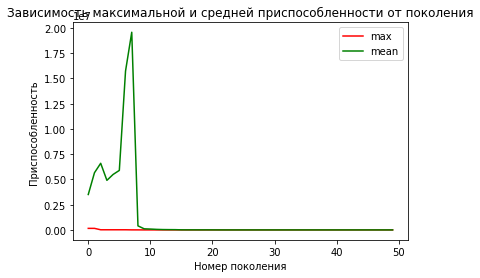

In [29]:
plt.plot(bestFitnessValues, color='red', label='max')
plt.plot(meanFitnessValues, color='green', label='mean')
plt.xlabel('Номер поколения')
plt.ylabel('Приспособленность ')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.legend()
plt.show()

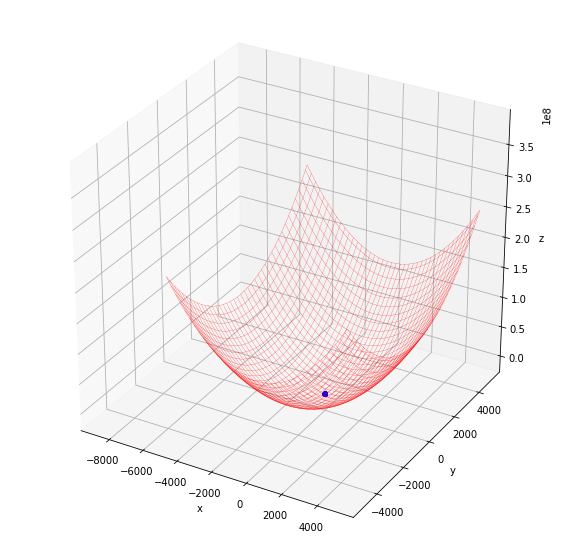

In [33]:
# Подготовка графика
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x = np.linspace(-5000, 5000, 80)
y = np.linspace(-5000, 5000, 80)
X, Y = np.meshgrid(x, y)
Z= fitness_function(X,Y)
ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)
# Другой вид отображжения графика
# ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5) 

# Хранит изображение
images = []

# Добавление изображения для каждого поколения
for t in range(len(particles)):
  image = ax.scatter3D([
                          particles[t][n][0] for n in range(population)],
                         [particles[t][n][1] for n in range(population)],
                         [fitness_function(particles[t][n][0],particles[t][n][1]) for n in range(population)], c='b') 
  images.append([image])
# Сгенерировать изображение и сохранить
animated_image = animation.ArtistAnimation(fig, # фигура, где отображается анимация
    images,              # кадры
    interval=60,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
# Потом нужно отдельно вызвать эту гиф, чтобы показать анимацию
animated_image.save('/content/gwo.gif', writer='pillow') 

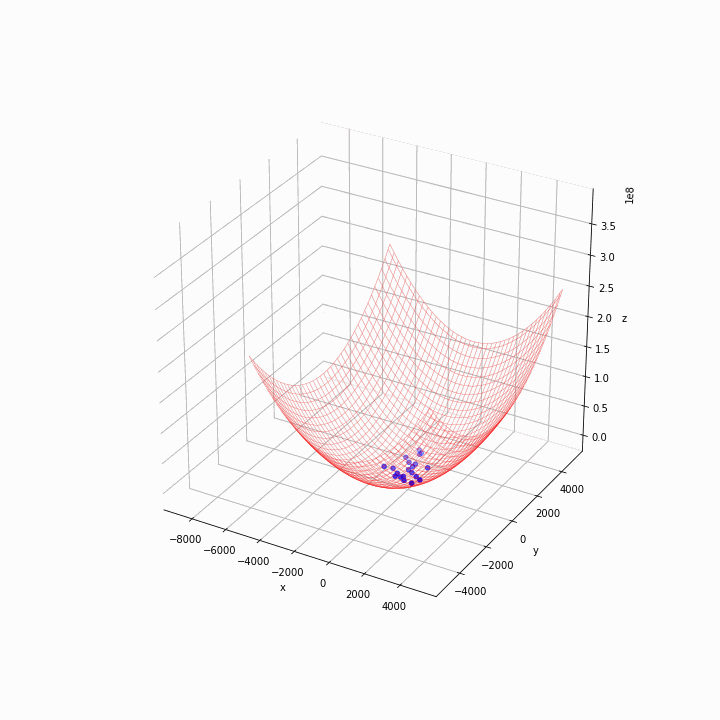

In [34]:
from IPython.display import Image

fname = '/content/gwo.gif'
Image(open(fname, 'rb').read())